In [1]:
pip install squarify


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#Importing modules

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import squarify
import os
import seaborn as sns
import matplotlib.pyplot as plt
import configparser

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#Importing dataset

In [4]:
config = configparser.ConfigParser()
config.read(os.path.abspath(f'{os.getcwd()}{os.sep}dwh_pipelines{os.sep}local_config.ini'))
final_info_path = config['data_filepath']['FINALDATA']

cust_data = pd.read_csv(f'{os.getcwd()}{os.sep}{final_info_path}{os.sep}' + 'CustomersData.csv')
discount_coup = pd.read_csv(f'{os.getcwd()}{os.sep}{final_info_path}{os.sep}' + 'Discount_Coupon.csv')
mrkt_spend = pd.read_csv(f'{os.getcwd()}{os.sep}{final_info_path}{os.sep}' + 'Marketing_Spend.csv')
online_sale = pd.read_csv(f'{os.getcwd()}{os.sep}{final_info_path}{os.sep}' + 'Online_Sales.csv')
tax_amt = pd.read_csv(f'{os.getcwd()}{os.sep}{final_info_path}{os.sep}' + 'Tax_amount.csv')

In [6]:
cust_data.head()

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49


In [7]:
discount_coup.head()

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [8]:
mrkt_spend.head()

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38
3,1/4/2019,4500,2928.55
4,1/5/2019,4500,4055.30


In [9]:
online_sale.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,16681,1/1/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used
3,17850,16682,1/1/2019,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used
4,17850,16682,1/1/2019,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used


In [10]:
tax_amt.head()

,Product_Category,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18


#1. Calculate Invoice amount or sale_amount or revenue for each transaction and item level

In [ ]:
online_sale.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,16681,1/1/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used
3,17850,16682,1/1/2019,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used
4,17850,16682,1/1/2019,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used


In [ ]:
discount_coup.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [ ]:
online_sale['Transaction_Date'] = pd.to_datetime(online_sale['Transaction_Date'], format='%m/%d/%Y')
online_sale['Month'] = online_sale['Transaction_Date'].dt.strftime('%b')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
result = pd.merge(online_sale, discount_coup, on=['Month', 'Product_Category'], how='left')
merged_df = pd.merge(result,tax_amt,on=['Product_Category'], how = 'left')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
merged_df['Coupon_Code'].fillna('Not Available',inplace=True)
merged_df['Discount_pct'].fillna(0, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
merged_df['Invoice'] = np.where(
    merged_df['Coupon_Status'] == 'Used',
    ((merged_df['Quantity'] * merged_df['Avg_Price']) * (1 - merged_df['Discount_pct']/100) * (1 + merged_df['GST'])) + merged_df['Delivery_Charges'],
    ((merged_df['Quantity'] * merged_df['Avg_Price']) * (1 + merged_df['GST'])) + merged_df['Delivery_Charges']
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#2. Perform Detailed exploratory analysis

In [ ]:
# Understanding how many customers acquired every month
merged_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST,Invoice
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.10,158.6729
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.10,158.6729
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan,OFF10,10.0,0.10,8.5295
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan,SALE10,10.0,0.18,109.9270
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan,AIO10,10.0,0.18,24.0230


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


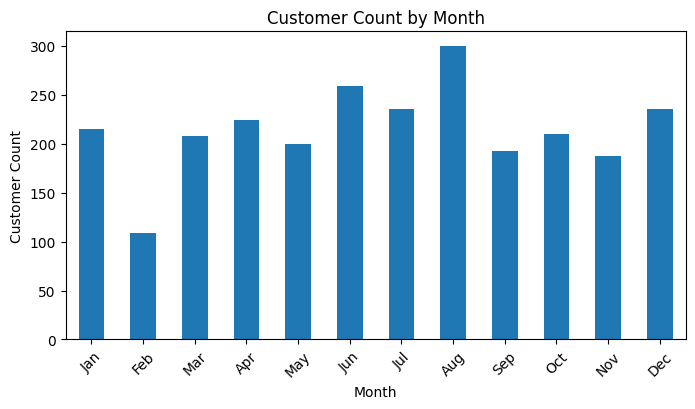

In [ ]:
merged_df['Month2'] = pd.to_datetime(merged_df['Month'], format='%b')
merged_df.groupby('Month2')['CustomerID'].count()
customer_count_by_month = merged_df.groupby('Month2')['CustomerID'].nunique()


plt.figure(figsize=(8, 4))
customer_count_by_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Customer Count')
plt.title('Customer Count by Month')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

In [ ]:
# Understand the retention of customers on a month-on-month basis
month_dict = {}
for i in merged_df['Month'].unique():
   month_dict[i] = merged_df[merged_df['Month']==i]['CustomerID'].unique().tolist()

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
retention = [0]
for i in range(11):
  set1 = set(month_dict[months[i]])
  set2 = set(month_dict[months[i+1]])
  common_items = len(set1.intersection(set2))
  retention.append(common_items)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


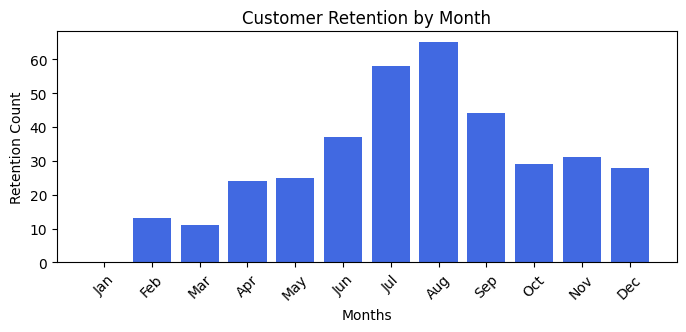

In [ ]:
plt.figure(figsize=(8, 3))
plt.bar(months, retention, color='royalblue')
plt.xlabel('Months')
plt.ylabel('Retention Count')
plt.title('Customer Retention by Month')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# How the revenues from existing/new customers on a month-on-month basis
temp = []
new_cust_each_month = {}
existing_cust_each_month = {}

no_of_new_cust_each_month = {}
no_of_existing_cust_each_month = {}

for i in merged_df['Month'].unique():
   x = merged_df[merged_df['Month']==i]['CustomerID'].unique().tolist()
   new_cust = [value for value in x if value not in temp]
   existing_cust = [value for value in x if value in temp]
   temp.extend(x)
   temp = list(set(temp))
   new_cust_each_month[i] = new_cust
   existing_cust_each_month[i] = existing_cust
   no_of_new_cust_each_month = len(new_cust)
   no_of_existing_cust_each_month = len(existing_cust)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
new_cust_each_month_revenue = {}
existing_cust_each_month_revenue = {}

for month, ids in new_cust_each_month.items():
    new_cust_each_month_revenue[month] = merged_df[(merged_df['Month'] == month) & (merged_df['CustomerID'].isin(ids))]['Invoice'].sum()

for month, ids in existing_cust_each_month.items():
    existing_cust_each_month_revenue[month] = merged_df[(merged_df['Month'] == month) & (merged_df['CustomerID'].isin(ids))]['Invoice'].sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


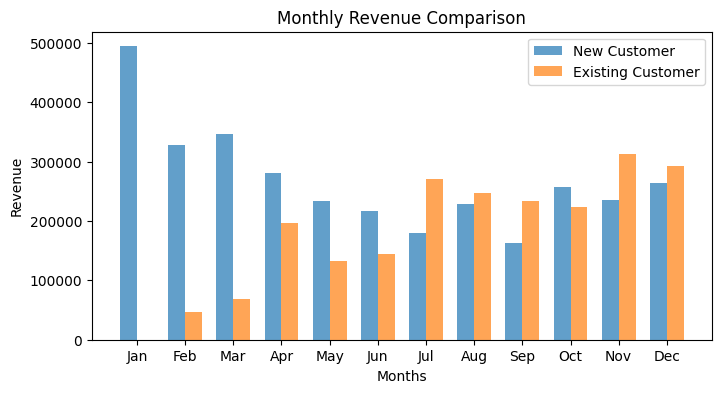

In [ ]:
months = list(existing_cust_each_month_revenue.keys())
new_cust = list(new_cust_each_month_revenue.values())
existing_cust = list(existing_cust_each_month_revenue.values())

plt.figure(figsize=(8, 4))
bar_width = 0.35
bar_positions = range(len(months))

plt.bar(bar_positions, new_cust, width=bar_width, label='New Customer', alpha=0.7)
plt.bar([pos + bar_width for pos in bar_positions], existing_cust, width=bar_width, label='Existing Customer', alpha=0.7)

plt.xlabel('Months')
plt.ylabel('Revenue')
plt.title('Monthly Revenue Comparison')
plt.xticks([pos + bar_width / 2 for pos in bar_positions], months)
plt.legend()
plt.show()

In [ ]:
# How the discounts play a role in the revenues

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


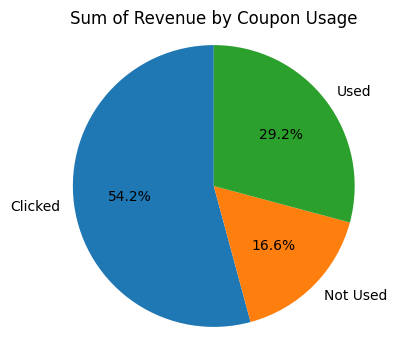

In [ ]:
grouped = merged_df.groupby('Coupon_Status')['Invoice'].sum()

# Create a pie chart
plt.figure(figsize=(4,4))
plt.pie(grouped, labels=grouped.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

plt.title('Sum of Revenue by Coupon Usage')

plt.show()

In [ ]:
# Which product was purchased mostly based on the quantity

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'GGOEGGOA017399'),
  Text(1, 0, 'GGOEGDHC018299'),
  Text(2, 0, 'GGOEGBMJ013399'),
  Text(3, 0, 'GGOEGOLC014299'),
  Text(4, 0, 'GGOEGFKQ020399'),
  Text(5, 0, 'GGOEGFSR022099'),
  Text(6, 0, 'GGOENEBQ078999'),
  Text(7, 0, 'GGOEGFYQ016599'),
  Text(8, 0, 'GGOEGOAQ012899'),
  Text(9, 0, 'GGOENEBJ079499')])

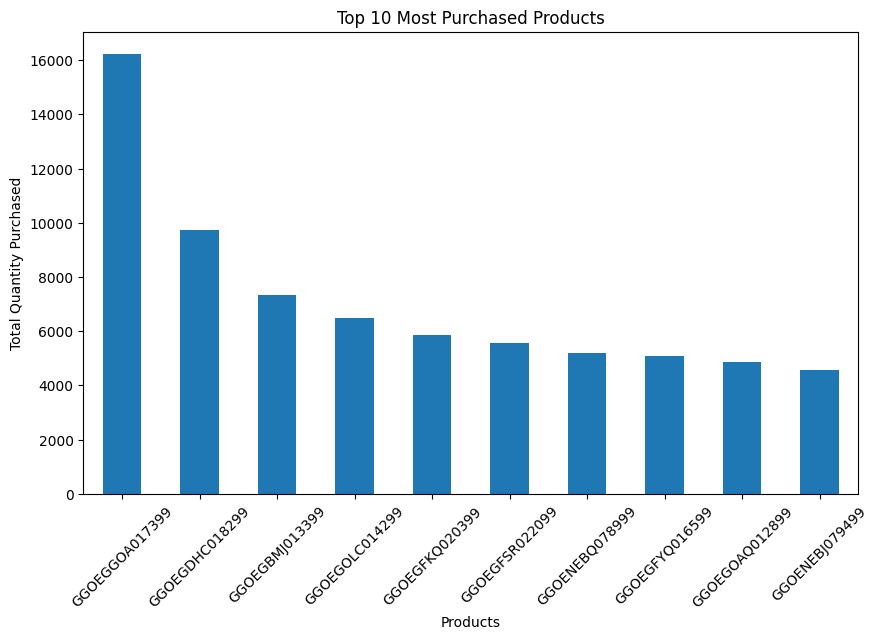

In [ ]:
category_quantity = merged_df.groupby('Product_SKU')['Quantity'].sum()

# Find the category with the highest total quantity
top_10_categories = category_quantity.sort_values(ascending=False).head(10)

# Create a bar chart for the top 10 products
plt.figure(figsize=(10, 6))
top_10_categories.plot(kind='bar')
plt.xlabel('Products')
plt.ylabel('Total Quantity Purchased')
plt.title('Top 10 Most Purchased Products')
plt.xticks(rotation=45)

In [ ]:
top10 = top_10_categories.reset_index()
filtered_df = merged_df[merged_df['Product_SKU'].isin(top10['Product_SKU'])]

# Group by 'product_id' and calculate summary statistics
summary_stats = filtered_df.groupby('Product_SKU').agg({
    'Product_Description': 'first',
    'Product_Category': 'first'  ,
     'Quantity': 'sum',
    'Invoice': 'sum'
}).reset_index()
summary_stats.columns = ['Product ID', 'Product Description', 'Product Category','Quantity','Revenue']

# Display the summary statistics DataFrame
summary_stats

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Product ID,Product Description,Product Category,Quantity,Revenue
0,GGOEGBMJ013399,Sport Bag,Bags,7321,42068.25962
1,GGOEGDHC018299,Google 22 oz Water Bottle,Drinkware,9728,37418.94532
2,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,5847,24533.63450
3,GGOEGFSR022099,Google Kick Ball,Lifestyle,5549,15676.89884
4,GGOEGFYQ016599,Foam Can and Bottle Cooler,Drinkware,5098,11559.08054
5,GGOEGGOA017399,Maze Pen,Office,16234,19786.07210
6,GGOEGOAQ012899,Ballpoint LED Light Pen,Office,4861,15697.98510
7,GGOEGOLC014299,Google Metallic Notebook Set,Office,6496,41481.37750
8,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,4570,731870.69120
9,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,5206,671620.06650


In [ ]:
# "Analyze key performance indicators (KPIs) such as revenue, order count, average order value, customer count (existing and new),
# and quantity, sorted by category, month, week, and day. Simplify this as:

# Top 5 categories by revenue and quantity.
# Top 5 revenue days.
# Top 5 revenue weeks.
# Top 2 revenue months."


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
merged_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST,Invoice,Month2
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.10,158.6729,1900-01-01
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.10,158.6729,1900-01-01
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan,OFF10,10.0,0.10,8.5295,1900-01-01
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan,SALE10,10.0,0.18,109.9270,1900-01-01
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan,AIO10,10.0,0.18,24.0230,1900-01-01


In [ ]:
top_categories_Invoice = merged_df.groupby('Product_Category').agg({'Invoice': 'sum', 'Quantity': 'sum'}).nlargest(5, 'Invoice')

top_categories_Quantity = merged_df.groupby('Product_Category').agg({'Invoice': 'sum', 'Quantity': 'sum'}).nlargest(5, 'Quantity')

top_categories_Quantity

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Invoice,Quantity
Product_Category,,
Office,3.819453e+05,88383
Apparel,8.278292e+05,32438
Drinkware,2.726220e+05,30501
Lifestyle,1.252760e+05,24881
Nest-USA,2.721646e+06,21430


In [ ]:
# Top 5 revenue days
merged_df['Date'] = merged_df['Transaction_Date'].dt.date
top_days = merged_df.groupby('Date')['Invoice'].sum().nlargest(5)
print("\nTop 5 revenue days:")
top_days


Top 5 revenue days:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Date
2019-04-05    59951.48052
2019-11-27    56662.02888
2019-04-18    54471.40715
2019-07-18    42947.02071
2019-08-02    40533.19244
Name: Invoice, dtype: float64

In [ ]:
# Top 5 revenue weeks
merged_df['Week'] = merged_df['Transaction_Date'].dt.strftime('%Y-%U')
top_weeks = merged_df.groupby('Week')['Invoice'].sum().nlargest(5)
print("\nTop 5 revenue weeks:")
print(top_weeks)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Top 5 revenue weeks:
Week
2019-47    171552.61754
2019-50    159533.68695
2019-49    151547.43730
2019-15    138720.69510
2019-48    135702.55428
Name: Invoice, dtype: float64


In [ ]:
# Top 2 revenue months
top_months = merged_df.groupby('Month2')['Invoice'].sum().nlargest(2)
print("\nTop 2 revenue months:")
print(top_months)

# Replace ['Invoice'].sum() to ['Transaction_ID'].nunique() to find based on number of orders


Top 2 revenue months:
Month2
1900-12-01    556112.29179
1900-11-01    547788.12626
Name: Invoice, dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Understand the trends/seasonality of sales by category, location, month, etc.
# How the number of orders varies and sales with different days

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
merged_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST,Invoice,Month2,Date,Week
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.10,158.6729,1900-01-01,2019-01-01,2019-00
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.10,158.6729,1900-01-01,2019-01-01,2019-00
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan,OFF10,10.0,0.10,8.5295,1900-01-01,2019-01-01,2019-00
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan,SALE10,10.0,0.18,109.9270,1900-01-01,2019-01-01,2019-00
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan,AIO10,10.0,0.18,24.0230,1900-01-01,2019-01-01,2019-00


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


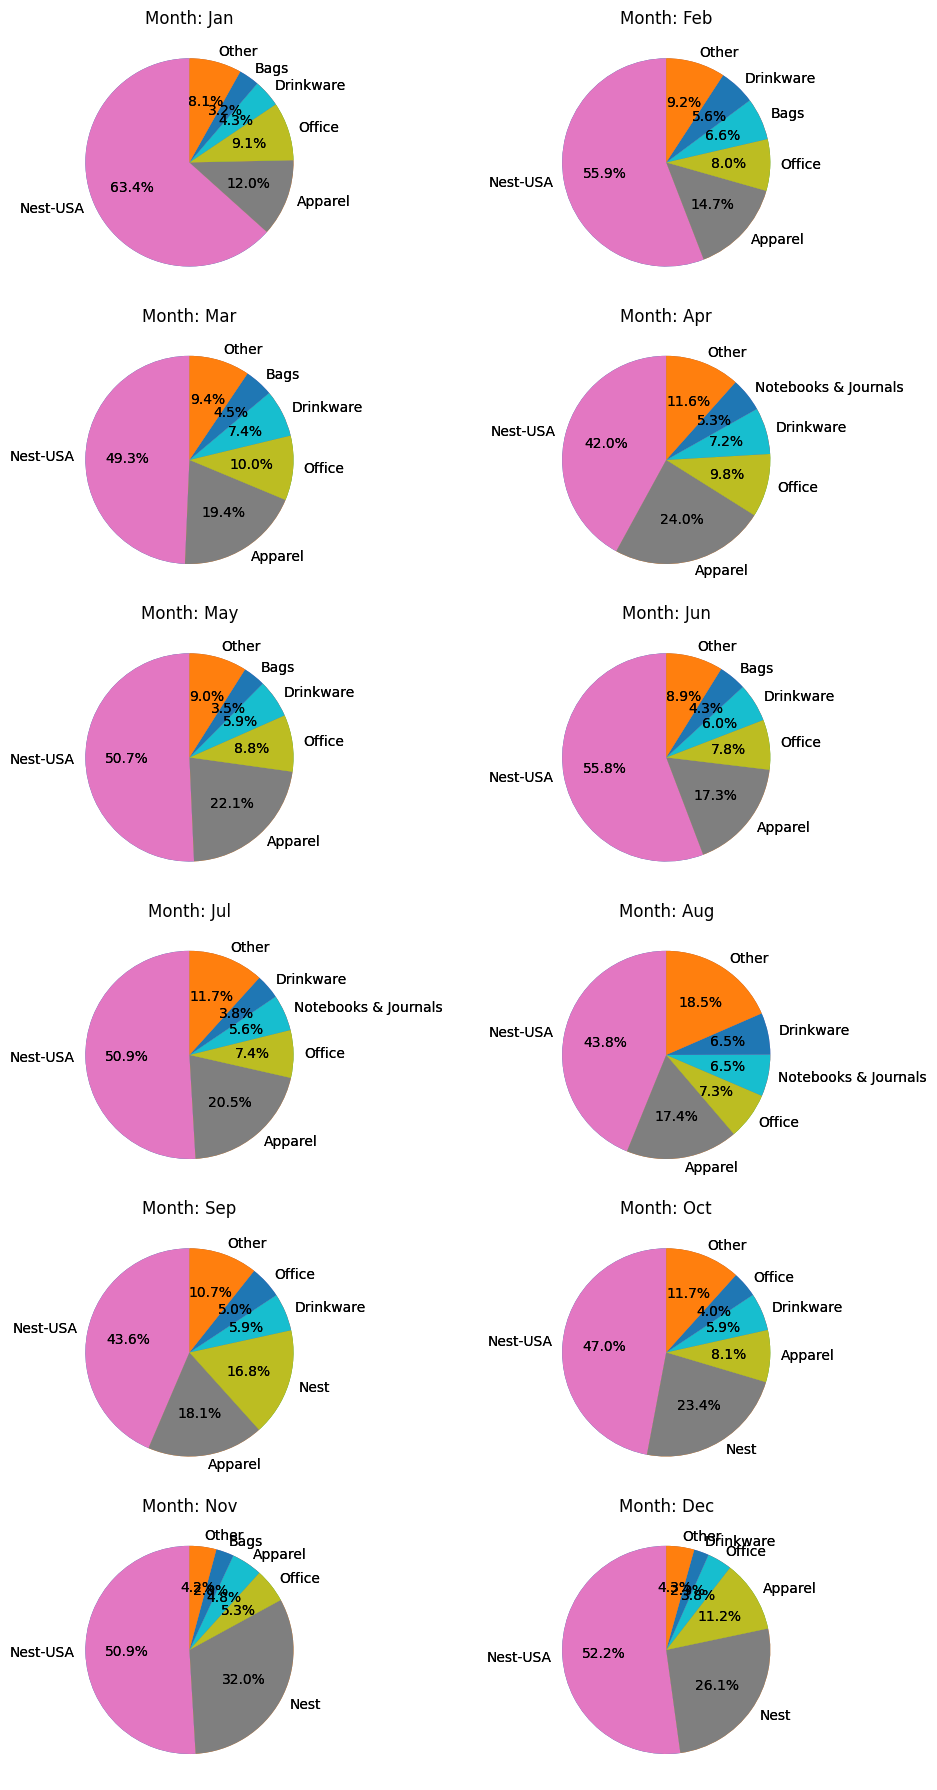

In [ ]:
months = merged_df['Month'].unique()
categories = merged_df['Product_Category'].unique()

# Create a grid of pie charts
num_rows = int(len(months)/2)
num_cols = 2  # Adjust as needed
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 3 * num_rows))
categories_to_show = 5

for i, month in enumerate(months):
    month_data = merged_df[merged_df['Month'] == month]
    total_invoice = month_data.groupby('Product_Category')['Invoice'].sum()
    total_invoice = total_invoice.sort_values(ascending=False)  # Sort the total_invoice

    if len(total_invoice) > categories_to_show:
      other_sum = total_invoice.iloc[categories_to_show:].sum()
      total_invoice = total_invoice.iloc[:categories_to_show]
      total_invoice['Other'] = other_sum
      row = i // num_cols
    col = i % num_cols


    ax = axes[row, col] # Access the subplot using [i, 0]

    ax.pie(total_invoice, labels=total_invoice.index, autopct='%1.1f%%', startangle=90)

    ax.pie(total_invoice, labels=total_invoice.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Month: {month}')

plt.tight_layout()
plt.show()

In [ ]:
# Calculate the Revenue, Marketing spend, percentage of marketing spend out of revenue, Tax, percentage of delivery charges by month

mrkt_spend['Date'] = pd.to_datetime(mrkt_spend['Date'], format='%m/%d/%Y')
mrkt_spend['Month'] = mrkt_spend['Date'].dt.strftime('%b')
mrkt_spend['total_spend'] = mrkt_spend['Offline_Spend'] + mrkt_spend['Online_Spend']

x = mrkt_spend.groupby('Month')['total_spend'].sum().reset_index()
y = merged_df.groupby('Month')['Invoice'].sum().reset_index()
z = merged_df.groupby('Month')['Discount_pct'].mean().reset_index()
tax = merged_df.groupby('Month')['GST'].mean().reset_index()
deli_charg = merged_df.groupby('Month')['Delivery_Charges'].sum().reset_index()

result = x.merge(y, on='Month', how='inner')
result = result.merge(z, on='Month', how='inner')
result = result.merge(tax, on='Month', how='inner')
result = result.merge(deli_charg, on='Month', how='inner')

result['market_spend_%'] = (result['total_spend']*100)/result['Invoice']
result['Delivery_Charges_%'] = (result['Delivery_Charges']*100)/result['Invoice']

result

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Month,total_spend,Invoice,Discount_pct,GST,Delivery_Charges,market_spend_%,Delivery_Charges_%
0,Apr,157026.83,477498.59102,9.874699,0.142545,41481.74,32.885297,8.687301
1,Aug,142904.15,475796.87554,19.876423,0.148522,61099.57,30.034697,12.841524
2,Dec,198648.75,556112.29179,30.000000,0.121919,37881.99,35.720978,6.811932
3,Feb,137107.92,375162.04730,19.762485,0.136114,49216.60,36.546319,13.118758
4,Jan,154928.95,494090.54875,9.901551,0.131691,59242.32,31.356388,11.990175
5,Jul,120217.85,451878.40904,9.895258,0.144870,48723.93,26.604026,10.782531
6,Jun,134318.14,361000.17429,29.756737,0.143203,37513.58,37.207223,10.391568
7,Mar,122250.09,415157.79044,29.613438,0.141742,60799.94,29.446657,14.645020
8,May,118259.64,365596.02956,19.755031,0.144845,41396.17,32.347080,11.322927
9,Nov,161144.96,547788.12626,19.979803,0.116425,32311.93,29.417388,5.898618


In [ ]:
# How marketing spend is impacting on revenue

correlation = result['total_spend'].corr(result['Invoice'])

print(f'Correlation between market_spend_% and Invoice: {correlation}')

Correlation between market_spend_% and Invoice: 0.79628352475623


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#3. Performing Customer Segmentation

In [ ]:
merged_df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST,Invoice,Month2,Date,Week
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.10,158.6729,1900-01-01,2019-01-01,2019-00
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.10,158.6729,1900-01-01,2019-01-01,2019-00
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan,OFF10,10.0,0.10,8.5295,1900-01-01,2019-01-01,2019-00
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan,SALE10,10.0,0.18,109.9270,1900-01-01,2019-01-01,2019-00
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan,AIO10,10.0,0.18,24.0230,1900-01-01,2019-01-01,2019-00


In [ ]:
today = pd.to_datetime('2020-01-01')  # Replace with the current date
segment = merged_df.groupby('CustomerID').agg({
    'Transaction_Date': lambda x: (today - x.max()).days,  # Calculate recency
    'Transaction_ID': 'count',  # Calculate frequency
    'Invoice': 'sum'  # Calculate monetary value
})

# Define thresholds for R, F, and M to segment customers
r_thresholds = [0, 100, 200, 300, float('inf')]  # Customize these as needed
f_thresholds = [0, 40, 70, 100, float('inf')]  # Customize these as needed
m_thresholds = [0, 4000, 7000,10000, float('inf')]  # Customize these as needed
# you can adjust this values by ploting sns.distplot(rfm['RFM_Segment'])

# Define segment labels
segment['R_Segment'] = pd.cut(segment['Transaction_Date'], bins=r_thresholds, labels=False) + 1
segment['F_Segment'] = pd.cut(segment['Transaction_ID'], bins=f_thresholds, labels=False) + 1
segment['M_Segment'] = pd.cut(segment['Invoice'], bins=m_thresholds, labels=False) + 1
# you can adjust thresold values by ploting sns.distplot(rfm['RFM_Segment'])

# Combine the three segments to get the final segment
segment['RFM_Segment'] = segment['R_Segment'] + segment['F_Segment']+ segment['M_Segment']


def h_segmentation(RFM_Segment):
    if RFM_Segment >= 9:
        return 'Can\'t Loose Them'
    elif ((RFM_Segment >= 8) and (RFM_Segment < 9)):
        return 'Champions'
    elif ((RFM_Segment >= 7) and (RFM_Segment < 8)):
        return 'Loyal'
    elif ((RFM_Segment >= 6) and (RFM_Segment < 7)):
        return 'Potential'
    elif ((RFM_Segment >= 5) and (RFM_Segment < 6)):
        return 'Promising'
    elif ((RFM_Segment >= 4) and (RFM_Segment < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'

segment['heuristic_segment'] = segment['RFM_Segment'].apply(h_segmentation)

# Merge the segment information back into the original dataset
df = merged_df.merge(segment[['heuristic_segment']], on='CustomerID', how='left')

In [ ]:
segment.head()

,Transaction_Date,Transaction_ID,Invoice,R_Segment,F_Segment,M_Segment,RFM_Segment,heuristic_segment
CustomerID,,,,,,,,
12346,108,2,174.98174,2,1,1,4,Needs Attention
12347,60,60,15686.84396,1,2,4,7,Loyal
12348,74,23,1689.55594,1,1,1,3,Require Activation
12350,18,17,1467.43528,1,1,1,3,Require Activation
12356,108,36,2007.42900,2,1,1,4,Needs Attention


In [ ]:
# Calculate average values for each RFM_Level, and return a size of each segment
rfm_level_agg = segment.groupby('heuristic_segment').agg({
    'R_Segment': ['mean','median'],
    'F_Segment': ['mean','median'],
    'M_Segment': ['mean', 'median', 'count']
}).round(1)
# Print the aggregated dataset
print(rfm_level_agg)

                   R_Segment        F_Segment        M_Segment             
                        mean median      mean median      mean median count
heuristic_segment                                                          
Can't Loose Them         1.9    1.0       3.7    4.0       3.8    4.0   107
Champions                2.3    2.0       2.7    3.0       3.0    3.0    53
Loyal                    2.1    2.0       2.4    2.0       2.5    2.0    80
Needs Attention          1.8    2.0       1.1    1.0       1.1    1.0   376
Potential                3.0    4.0       1.5    1.0       1.5    1.0   198
Promising                2.5    3.0       1.3    1.0       1.2    1.0   333
Require Activation       1.0    1.0       1.0    1.0       1.0    1.0   321


In [ ]:
rfm_level_agg.columns.droplevel()

Index(['mean', 'median', 'mean', 'median', 'mean', 'median', 'count'], dtype='object')

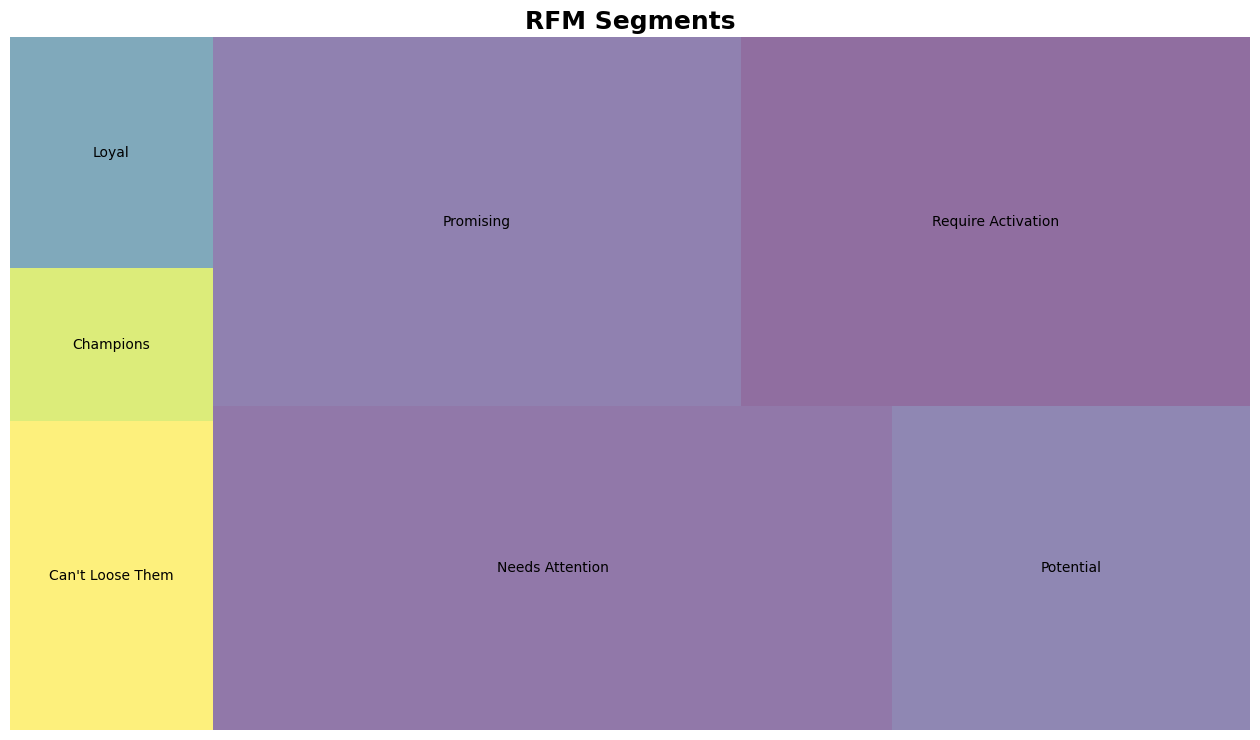

In [ ]:
rfm_level_agg.columns = ['RecencyMean','RecencyMedian','FrequencyMean','FrequencyMedian',
                         'MonetaryMean','MonetaryMedian','Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=rfm_level_agg['Count'],
              label=['Can\'t Loose Them',
                     'Champions',
                     'Loyal',
                     'Needs Attention',
                     'Potential',
                     'Promising',
                     'Require Activation'], alpha=.6 )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

#Kmeans Segment

In [ ]:
# Scientific (Using K-Means) & Understand the profiles. Define a strategy for each segment

features = segment[['Transaction_Date', 'Transaction_ID', 'Invoice']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Choose the number of clusters (K)
k = 4

# Apply K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=0)
segment['kmean_segment'] = kmeans.fit_predict(scaled_features)

segment.head()

,Transaction_Date,Transaction_ID,Invoice,R_Segment,F_Segment,M_Segment,RFM_Segment,heuristic_segment,kmean_segment
CustomerID,,,,,,,,,
12346,108,2,174.98174,2,1,1,4,Needs Attention,0
12347,60,60,15686.84396,1,2,4,7,Loyal,3
12348,74,23,1689.55594,1,1,1,3,Require Activation,0
12350,18,17,1467.43528,1,1,1,3,Require Activation,0
12356,108,36,2007.42900,2,1,1,4,Needs Attention,0


In [ ]:
segment.groupby('kmean_segment')[['Transaction_Date', 'Transaction_ID', 'Invoice']].mean()

,Transaction_Date,Transaction_ID,Invoice
kmean_segment,,,
0,78.212121,26.349144,2593.963364
1,255.359347,20.695100,1993.572948
2,30.200000,590.400000,70779.311820
3,85.437908,121.372549,12916.243788


In [ ]:
# Define labels based on cluster characteristics
def label_clusters(cluster):
    if cluster == 2:
        return 'Premium'
    elif cluster == 3:
        return 'Gold'
    elif cluster == 0:
        return 'Silver'
    else:
        return 'Standard'

# Apply the label_clusters function to assign labels
segment['kmean_segment_label'] = segment['kmean_segment'].apply(label_clusters)
segment.drop(columns='kmean_segment',inplace=True)

In [ ]:
segment['heuristic_segment'].value_counts()

Needs Attention       376
Promising             333
Require Activation    321
Potential             198
Can't Loose Them      107
Loyal                  80
Champions              53
Name: heuristic_segment, dtype: int64

In [ ]:
segment['kmean_segment_label'].value_counts()

Silver      759
Standard    551
Gold        153
Premium       5
Name: kmean_segment_label, dtype: int64

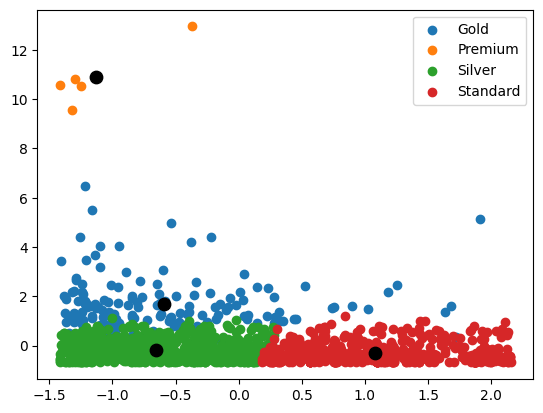

In [ ]:
centroids = kmeans.cluster_centers_
label = segment['kmean_segment_label']

#Getting unique labels
u_labels = np.unique(label)

#plotting the results:
for i in u_labels:
    plt.scatter(scaled_features[label == i , 0] , scaled_features[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

#4. Predicting Customer Lifetime Value (Low Value/Medium Value/High Value)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
segment.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction_Date,Transaction_ID,Invoice,R_Segment,F_Segment,M_Segment,RFM_Segment,heuristic_segment,kmean_segment_label
CustomerID,,,,,,,,,
12346,108,2,174.98174,2,1,1,40,Standard,Silver
12347,60,60,15686.84396,1,2,4,70,Silver,Gold
12348,74,23,1689.55594,1,1,1,30,Standard,Silver
12350,18,17,1467.43528,1,1,1,30,Standard,Silver
12356,108,36,2007.42900,2,1,1,40,Standard,Silver


In [ ]:
segment['Value_Category'] = pd.cut(segment['Invoice'], bins=[0, 500, 1000, 2500, 5000, float('inf')],
                              labels=['Low Value', 'Low Medium Value', 'Medium Value', 'Medium High Value', 'High Value'])

# Select features and target variable
X = segment[['Invoice']]
y = segment['Value_Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(classification_report)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9897959183673469
                   precision    recall  f1-score   support

       High Value       1.00      1.00      1.00        79
 Low Medium Value       1.00      0.93      0.96        28
        Low Value       1.00      1.00      1.00        56
Medium High Value       0.98      1.00      0.99        56
     Medium Value       0.97      0.99      0.98        75

         accuracy                           0.99       294
        macro avg       0.99      0.98      0.99       294
     weighted avg       0.99      0.99      0.99       294



#5. Cross-Selling (Which products are selling together)

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Discount_pct,GST,Invoice,Month2,Date,Week,heuristic_segment,InvoiceMonth,CohortMonth,CohortIndex
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,10.0,0.10,158.6729,1900-01-01,2019-01-01,2019-00,Gold,2019-01-01,2019-01-01,1
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,10.0,0.10,158.6729,1900-01-01,2019-01-01,2019-00,Gold,2019-01-01,2019-01-01,1
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,...,10.0,0.10,8.5295,1900-01-01,2019-01-01,2019-00,Gold,2019-01-01,2019-01-01,1
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,...,10.0,0.18,109.9270,1900-01-01,2019-01-01,2019-00,Gold,2019-01-01,2019-01-01,1
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,...,10.0,0.18,24.0230,1900-01-01,2019-01-01,2019-00,Gold,2019-01-01,2019-01-01,1


In [ ]:
basket = df.groupby(['Transaction_ID', 'Product_Category'])['Quantity'].sum().unstack().fillna(0)

# Convert quantities to binary values (1 if item is in the transaction, 0 otherwise)
basket[basket > 0] = 1

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

# Extract association rules
association_rules_df = association_rules(frequent_itemsets, metric='confident', min_threshold=0.5)

# Interpret the association rules and identify products to bundle

# For example, to identify items that are frequently purchased together:
frequent_itemsets['itemsets'].apply(lambda x: list(x))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


0                           [Apparel]
1                              [Bags]
2                           [Bottles]
3                         [Drinkware]
4                          [Headgear]
5                         [Lifestyle]
6                              [Nest]
7                       [Nest-Canada]
8                          [Nest-USA]
9              [Notebooks & Journals]
10                           [Office]
11                             [Waze]
12                    [Apparel, Bags]
13               [Apparel, Drinkware]
14                [Apparel, Headgear]
15               [Apparel, Lifestyle]
16                [Apparel, Nest-USA]
17    [Apparel, Notebooks & Journals]
18                  [Apparel, Office]
19                  [Drinkware, Bags]
20                  [Lifestyle, Bags]
21                     [Office, Bags]
22             [Lifestyle, Drinkware]
23                [Office, Drinkware]
24                [Lifestyle, Office]
25                   [Nest, Nest-USA]
26     [Offi

In [ ]:
association_rules_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Apparel),(Bags),0.324369,0.061650,0.025657,0.079100,1.283051,0.005660,1.018949,0.326520
1,(Bags),(Apparel),0.061650,0.324369,0.025657,0.416181,1.283051,0.005660,1.157262,0.235101
2,(Apparel),(Drinkware),0.324369,0.100714,0.045010,0.138762,1.377784,0.012342,1.044179,0.405838
3,(Drinkware),(Apparel),0.100714,0.324369,0.045010,0.446910,1.377784,0.012342,1.221557,0.304905
4,(Apparel),(Headgear),0.324369,0.026894,0.017318,0.053389,1.985140,0.008594,1.027989,0.734509
...,...,...,...,...,...,...,...,...,...,...
71,"(Lifestyle, Drinkware)",(Office),0.025857,0.140697,0.016719,0.646605,4.595736,0.013081,2.431566,0.803175
72,"(Office, Drinkware)",(Lifestyle),0.046287,0.068313,0.016719,0.361207,5.287504,0.013557,1.458511,0.850229
73,(Lifestyle),"(Office, Drinkware)",0.068313,0.046287,0.016719,0.244743,5.287504,0.013557,1.262766,0.870330
74,(Office),"(Lifestyle, Drinkware)",0.140697,0.025857,0.016719,0.118832,4.595736,0.013081,1.105513,0.910513


#6. Predicting Next Purchase Day

In [ ]:
segment.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction_Date,Transaction_ID,Invoice,R_Segment,F_Segment,M_Segment,RFM_Segment,heuristic_segment,kmean_segment_label,Value_Category
CustomerID,,,,,,,,,,
12346,108,2,174.98174,2,1,1,40,Standard,Silver,Low Value
12347,60,60,15686.84396,1,2,4,70,Silver,Gold,High Value
12348,74,23,1689.55594,1,1,1,30,Standard,Silver,Medium Value
12350,18,17,1467.43528,1,1,1,30,Standard,Silver,Medium Value
12356,108,36,2007.42900,2,1,1,40,Standard,Silver,Medium Value


In [ ]:
# Filter for repeat customers and calculate average days between transactions
repeat_customers = df.groupby('CustomerID').filter(lambda x: len(x) > 1)
temp = repeat_customers.groupby('CustomerID')['Transaction_Date'].apply(lambda x: x.diff().mean().days).reset_index()

# Create the dependent variable by categorizing average days
temp['Next_Purchase_Category'] = pd.cut(temp['Transaction_Date'], bins=[-1, 0, 1, 2, 3, 7, 15, 30, 60, 90, float('inf')],
                                                      labels=[ '0 days', '1 days', '2 days', '3 days', '3-7 days', '7-15 days', '15-30 days', '30-60 days', '60-90 days', '90+ days'])
temp = pd.merge(segment,temp,on='CustomerID', how = 'right')

In [ ]:
temp.head()

,CustomerID,Transaction_Date_x,Transaction_ID,Invoice,R_Segment,F_Segment,M_Segment,RFM_Segment,heuristic_segment,kmean_segment_label,Value_Category,Transaction_Date_y,Next_Purchase_Category
0,12346,108,2,174.98174,2,1,1,4,3,2,2,0,0 days
1,12347,60,60,15686.84396,1,2,4,7,2,0,0,3,3 days
2,12348,74,23,1689.55594,1,1,1,3,6,2,4,5,3-7 days
3,12350,18,17,1467.43528,1,1,1,3,6,2,4,0,0 days
4,12356,108,36,2007.42900,2,1,1,4,3,2,4,0,0 days


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
temp['heuristic_segment'] = label_encoder.fit_transform(temp['heuristic_segment'])
temp['kmean_segment_label'] = label_encoder.fit_transform(temp['kmean_segment_label'])
temp['Value_Category'] = label_encoder.fit_transform(temp['Value_Category'])

# Split the dataset into features and target variable
X = temp.drop(['Next_Purchase_Category'], axis=1)  # Features
y = temp['Next_Purchase_Category']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and train a Random Forest classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 0.9715302491103203


#7. Perform cohort analysis by defining below cohorts

In [ ]:
online = df
online.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST,Invoice,Month2,Date,Week,heuristic_segment
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.10,158.6729,1900-01-01,2019-01-01,2019-00,Gold
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,0.10,158.6729,1900-01-01,2019-01-01,2019-00,Gold
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan,OFF10,10.0,0.10,8.5295,1900-01-01,2019-01-01,2019-00,Gold
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan,SALE10,10.0,0.18,109.9270,1900-01-01,2019-01-01,2019-00,Gold
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan,AIO10,10.0,0.18,24.0230,1900-01-01,2019-01-01,2019-00,Gold


In [ ]:
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

online['InvoiceMonth'] = online['Transaction_Date'].apply(get_month)
#online['CohortMonth'] = group1.trans
#online

online['CohortMonth'] = online.groupby(['CustomerID'])["InvoiceMonth"].transform('min')
print(online.describe())

        CustomerID  Transaction_ID      Quantity     Avg_Price  \
count  52924.00000    52924.000000  52924.000000  52924.000000   
mean   15346.70981    32409.825675      4.497638     52.237646   
std     1766.55602     8648.668977     20.104711     64.006882   
min    12346.00000    16679.000000      1.000000      0.390000   
25%    13869.00000    25384.000000      1.000000      5.700000   
50%    15311.00000    32625.500000      1.000000     16.990000   
75%    16996.25000    39126.250000      2.000000    102.130000   
max    18283.00000    48497.000000    900.000000    355.740000   

       Delivery_Charges  Discount_pct           GST       Invoice  
count      52924.000000  52924.000000  52924.000000  52924.000000  
mean          10.517630     19.802358      0.137462    101.983198  
std           19.475613      8.278878      0.045825    172.365729  
min            0.000000      0.000000      0.050000      4.603500  
25%            6.000000     10.000000      0.100000     20.160000

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

inv_year, inv_month, _ = get_date_int(online, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date_int(online, 'CohortMonth')


years_diff = inv_year - cohort_year
months_diff = inv_month - cohort_month

online['CohortIndex'] = (years_diff*12) + months_diff + 1
online.head(7)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Discount_pct,GST,Invoice,Month2,Date,Week,heuristic_segment,InvoiceMonth,CohortMonth,CohortIndex
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,10.0,0.10,158.6729,1900-01-01,2019-01-01,2019-00,Gold,2019-01-01,2019-01-01,1
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,10.0,0.10,158.6729,1900-01-01,2019-01-01,2019-00,Gold,2019-01-01,2019-01-01,1
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,...,10.0,0.10,8.5295,1900-01-01,2019-01-01,2019-00,Gold,2019-01-01,2019-01-01,1
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,...,10.0,0.18,109.9270,1900-01-01,2019-01-01,2019-00,Gold,2019-01-01,2019-01-01,1
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,...,10.0,0.18,24.0230,1900-01-01,2019-01-01,2019-00,Gold,2019-01-01,2019-01-01,1
5,17850,16682,2019-01-01,GGOEGBMJ013399,Sport Bag,Bags,15,5.15,6.5,Used,...,10.0,0.18,88.5395,1900-01-01,2019-01-01,2019-00,Gold,2019-01-01,2019-01-01,1
6,17850,16682,2019-01-01,GGOEGDHC018299,Google 22 oz Water Bottle,Drinkware,15,3.08,6.5,Not Used,...,10.0,0.18,61.0160,1900-01-01,2019-01-01,2019-00,Gold,2019-01-01,2019-01-01,1


In [ ]:
#monthly active users for each cohort


cohort_data = online.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')
cohort_counts

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2019-01-01,215.0,13.0,24.0,34.0,23.0,44.0,35.0,47.0,23.0,28.0,20.0,34.0
2019-02-01,96.0,7.0,9.0,16.0,17.0,22.0,19.0,15.0,12.0,11.0,16.0,NaN
2019-03-01,177.0,18.0,35.0,25.0,32.0,33.0,22.0,22.0,15.0,19.0,NaN,NaN
2019-04-01,163.0,14.0,24.0,24.0,18.0,15.0,10.0,16.0,12.0,NaN,NaN,NaN
2019-05-01,112.0,12.0,9.0,13.0,10.0,13.0,14.0,8.0,NaN,NaN,NaN,NaN
2019-06-01,137.0,20.0,22.0,12.0,11.0,14.0,11.0,NaN,NaN,NaN,NaN,NaN
2019-07-01,94.0,13.0,4.0,6.0,11.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01,135.0,14.0,15.0,10.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-01,78.0,6.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#retention rate

cohort_size = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_size, axis=0)
retention = retention.round(3)
retention.index = retention.index.strftime('%m-%Y')
retention

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
01-2019,1.0,0.060,0.112,0.158,0.107,0.205,0.163,0.219,0.107,0.130,0.093,0.158
02-2019,1.0,0.073,0.094,0.167,0.177,0.229,0.198,0.156,0.125,0.115,0.167,NaN
03-2019,1.0,0.102,0.198,0.141,0.181,0.186,0.124,0.124,0.085,0.107,NaN,NaN
04-2019,1.0,0.086,0.147,0.147,0.110,0.092,0.061,0.098,0.074,NaN,NaN,NaN
05-2019,1.0,0.107,0.080,0.116,0.089,0.116,0.125,0.071,NaN,NaN,NaN,NaN
06-2019,1.0,0.146,0.161,0.088,0.080,0.102,0.080,NaN,NaN,NaN,NaN,NaN
07-2019,1.0,0.138,0.043,0.064,0.117,0.096,NaN,NaN,NaN,NaN,NaN,NaN
08-2019,1.0,0.104,0.111,0.074,0.059,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09-2019,1.0,0.077,0.038,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# calculating average quantity

cohort_qty = online.groupby(['CohortMonth', 'CohortIndex'])['Quantity'].mean().reset_index()
avg_qty = cohort_qty.pivot(index='CohortMonth', columns='CohortIndex', values='Quantity')
avg_qty.index = avg_qty.index.strftime('%m-%Y')

# calculating average price

cohort_price = online.groupby(['CohortMonth', 'CohortIndex'])['Avg_Price'].mean().reset_index()
avg_price = cohort_price.pivot(index='CohortMonth', columns='CohortIndex', values='Avg_Price')
avg_price.index = avg_price.index.strftime('%m-%Y')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


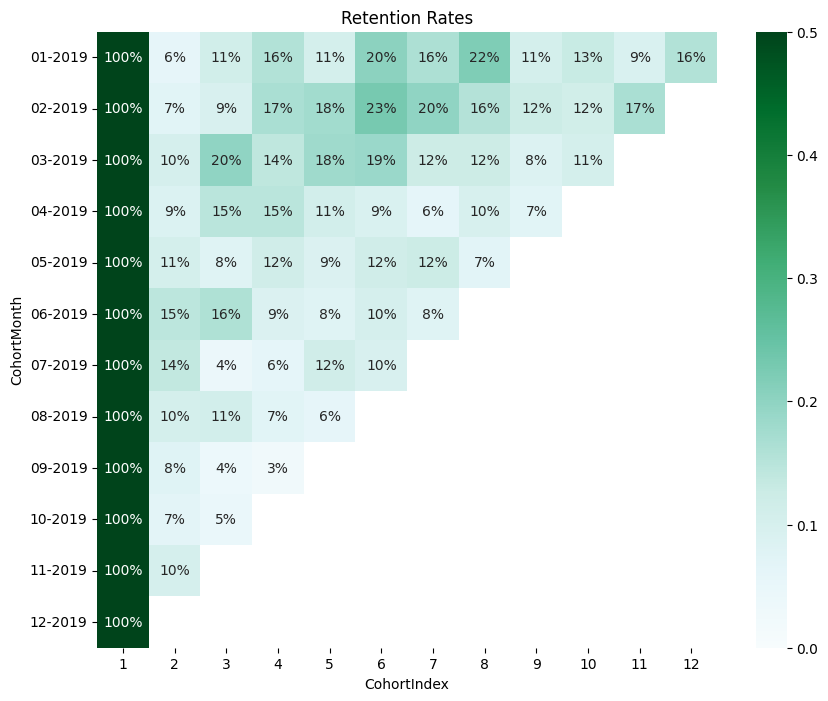

In [ ]:
plt.figure(figsize=(10,8))
plt.title("Retention Rates")
sns.heatmap(data= retention, annot=True, fmt='.0%', vmin=0.0, vmax=0.5, cmap='BuGn')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


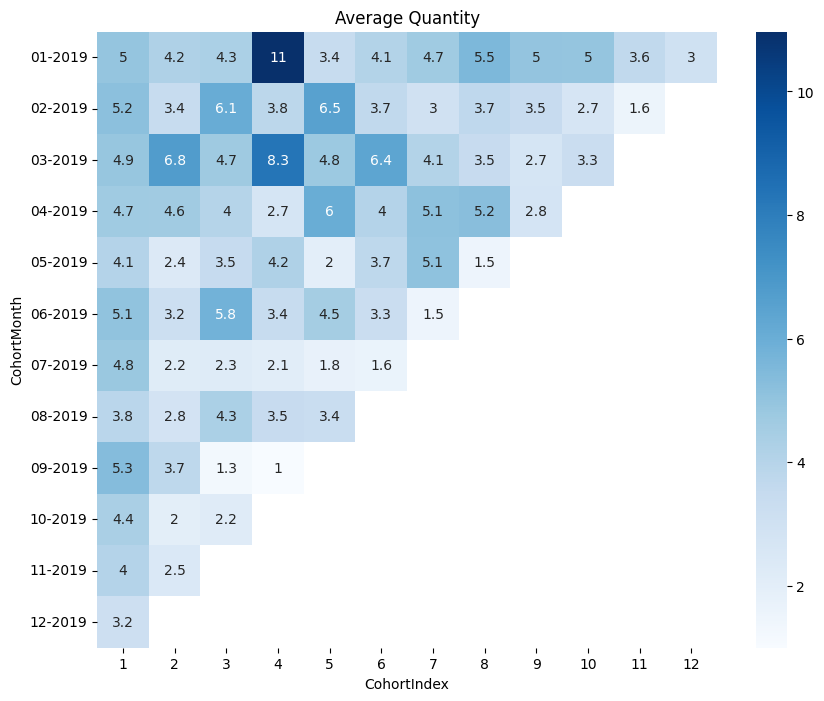

In [ ]:
plt.figure(figsize=(10,8))
plt.title("Average Quantity")
sns.heatmap(data= avg_qty, annot=True, cmap='Blues')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


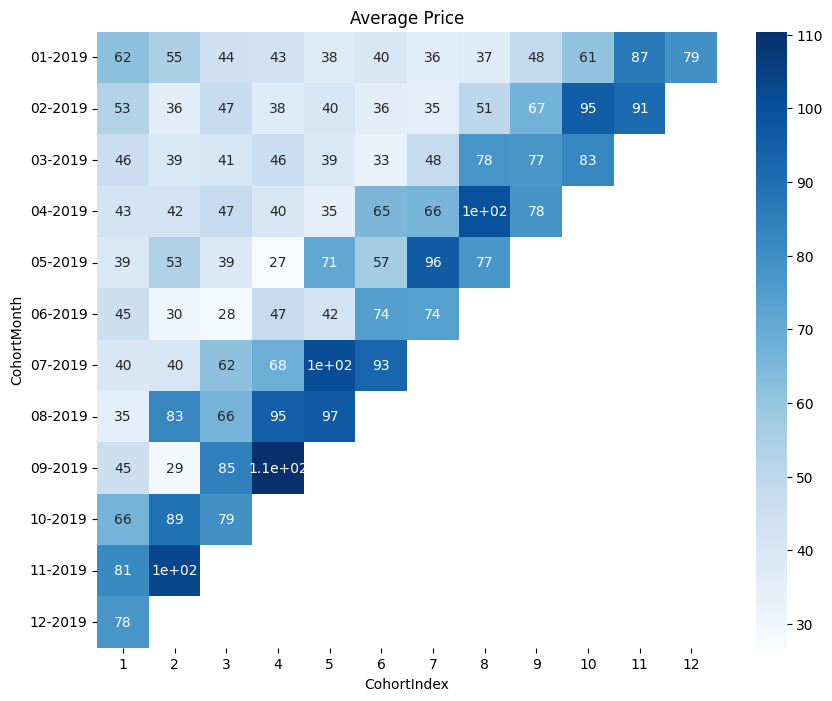

In [ ]:
plt.figure(figsize=(10,8))
plt.title("Average Price")
sns.heatmap(data= avg_price, annot=True, cmap='Blues')
plt.show()